In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
import tensorflow as tf
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
import matplotlib.pyplot as plt

In [3]:
tf.compat.v1.disable_eager_execution()

DIMENSION = 256
loaded_model = load_model('./model')
x_stealed_loaded = np.load('x_val.npy')
y_stealed_loaded = np.loadtxt('y_val.txt', delimiter=',')

2023-05-17 21:53:37.737662: W tensorflow/c/c_api.cc:304] Operation '{name:'AssignVariableOp_15' id:351 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_15}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](total_4, Identity_15)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [4]:
classifier = KerasClassifier(loaded_model)

In [5]:
attack_fgsm = FastGradientMethod(
    estimator=classifier, 
    eps=2.7
)

In [6]:
test_images_adv = attack_fgsm.generate(x=x_stealed_loaded)

/Users/oscarsaravia/Documents/Universidad/security-data-science/SDS-LAB07/venv/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-17 21:54:06.056346: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_1_1/Sigmoid' id:392 op device:{requested: '', assigned: ''} def:{{{node dense_1_1/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


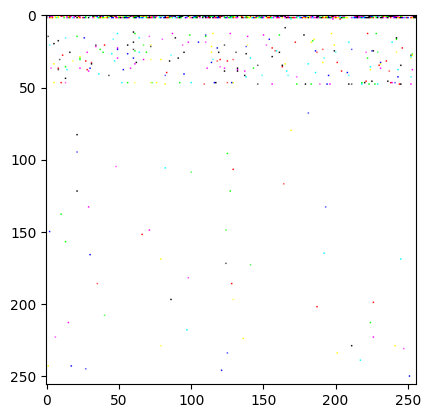

In [9]:
plt.imshow(X=test_images_adv[0])

In [25]:
print(len(x_stealed_loaded))
print(len(y_stealed_loaded))
classifier._model.evaluate(
    x=x_stealed_loaded,
    y=y_stealed_loaded
)
# score_original = classifier._model.evaluate(
#     x=x_stealed_loaded,
#     y=y_stealed_loaded
# )

# score_stolen = classifier._model.evaluate(
#     x=test_images_adv,
#     y=y_stealed_loaded
# )

# # Comparing test losses
# print(f"Original test loss: {score_original[0]:.2f} "  f"vs stolen test loss: {score_stolen[0]:.2f}")

# # Comparing test accuracies
# print(f"Original test accuracy: {score_original[1]:.2f} " f"vs adversarial test accuracy: {score_stolen[1]:.2f}")

4670
4670


ValueError: A target array with shape (4670, 26) was passed for an output of shape (None, 25) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.